## Modeling Critical Food Violation by Food Establishments in the City of Chicago

## Project Plan
 - Project Goal
 - Dataset and features
 - Exploratory data analysis (EDA) 
 - Patterns, insights, pecularities of data
 - Data preprocessing
 - Feature engineering and description
 - Cross-validation, hyperparameter tuning
 - Validation and learning curves
 - Prediction for hold-out and test samples
 - Model evaluation with metrics description
 - Conclusions


### Project Goal

### Data Set and Features  


## Exploratory Data Analysis 

In [657]:
#important libraries
%matplotlib inline
import warnings
warnings.filterwarnings('ignore')
import pandas as pd
import seaborn as sns
import matplotlib.pyplot as plt
import json
sns.set(rc={'figure.figsize':(12, 6),"font.size":20,"axes.titlesize":20,"axes.labelsize":20},style="darkgrid")
#sns.set(style="darkgrid")

In [658]:
food_data = pd.read_json('../data/raw/food-inspection.json', convert_dates = ['inspection_date'])

In [659]:
food_data.head(5)

,:@computed_region_43wa_7qmu,:@computed_region_6mkv_f3dw,:@computed_region_awaf_s7ux,:@computed_region_bdys_3d7i,:@computed_region_vrxf_vc4k,address,aka_name,city,dba_name,facility_type,inspection_date,inspection_id,inspection_type,latitude,license_,location,longitude,results,risk,state,violations,zip
0,27.0,4450.0,42.0,30.0,20.0,6248 N CALIFORNIA AVE,MUSASHI JAPANESE RESTAURANT,CHICAGO,MUSASHI JAPANESE RESTAURANT,Restaurant,2019-03-27,2280158,Canvass,41.995400,47917,"{'type': 'Point', 'coordinates': [-87.69971133...",-87.699711,No Entry,Risk 1 (High),IL,None,60659.0
1,29.0,22243.0,34.0,657.0,36.0,6182 N NORTHWEST HWY,WINESTYLES,CHICAGO,WINESTYLES,Restaurant,2019-03-27,2280117,License Re-Inspection,41.994044,2632296,"{'type': 'Point', 'coordinates': [-87.80211988...",-87.802120,Pass,Risk 2 (Medium),IL,52. SEWAGE & WASTE WATER PROPERLY DISPOSED - C...,60631.0
10,42.0,4447.0,33.0,316.0,73.0,10210 S CENTRAL PARK AVE,STARBUCKS (ST XAVIER MORRIS HALL),CHICAGO,STARBUCKS,Restaurant,2019-03-27,2280150,Canvass,41.707481,2464644,"{'type': 'Point', 'coordinates': [-87.71131771...",-87.711318,Pass,Risk 2 (Medium),IL,10. ADEQUATE HANDWASHING SINKS PROPERLY SUPPLI...,60655.0
100,36.0,14914.0,22.0,92.0,38.0,204 N WELLS ST,THE VEGGIE GRILL,CHICAGO,"THE VEGGIE GRILL, INC",Restaurant,2019-03-25,2280011,Canvass,41.885863,2560625,"{'type': 'Point', 'coordinates': [-87.63408111...",-87.634081,Pass w/ Conditions,Risk 1 (High),IL,"1. PERSON IN CHARGE PRESENT, DEMONSTRATES KNOW...",60606.0
101,42.0,22212.0,33.0,380.0,74.0,10939 S WESTERN AVE,SEE THRU CHINESE KITCHEN,CHICAGO,SEE THRU CHINESE KITCHEN,Restaurant,2019-03-25,2279985,Canvass Re-Inspection,41.694221,36468,"{'type': 'Point', 'coordinates': [-87.68108589...",-87.681086,Pass,Risk 1 (High),IL,51. PLUMBING INSTALLED; PROPER BACKFLOW DEVICE...,60643.0


In [660]:
food_data = food_data.drop(food_data.columns[0:5], axis=1)
shape = food_data.shape

In [661]:
print(" So there are %d rows and %d columns in the data" % (shape[0], shape[1]))

 So there are 1000 rows and 17 columns in the data


In [662]:
food_data.info()

<class 'pandas.core.frame.DataFrame'>
Int64Index: 1000 entries, 0 to 999
Data columns (total 17 columns):
address            1000 non-null object
aka_name           991 non-null object
city               998 non-null object
dba_name           1000 non-null object
facility_type      984 non-null object
inspection_date    1000 non-null datetime64[ns]
inspection_id      1000 non-null int64
inspection_type    1000 non-null object
latitude           993 non-null float64
license_           1000 non-null int64
location           993 non-null object
longitude          993 non-null float64
results            1000 non-null object
risk               1000 non-null object
state              1000 non-null object
violations         752 non-null object
zip                998 non-null float64
dtypes: datetime64[ns](1), float64(3), int64(2), object(11)
memory usage: 140.6+ KB


In [663]:
food_data.describe()

,inspection_id,latitude,license_,longitude,zip
count,1.000000e+03,993.000000,1.000000e+03,993.000000,998.000000
mean,2.275233e+06,41.893282,1.984464e+06,-87.700651,60632.749499
std,1.288494e+04,0.088847,9.140417e+05,0.060822,28.677772
min,2.015568e+06,41.677455,0.000000e+00,-87.914428,60091.000000
25%,2.269078e+06,41.850451,1.878466e+06,-87.727943,60618.000000
50%,2.279394e+06,41.917238,2.373908e+06,-87.695312,60634.000000
75%,2.279743e+06,41.961208,2.621281e+06,-87.655086,60647.000000
max,2.280168e+06,42.018813,3.808890e+06,-87.549716,60707.000000


<Figure size 864x360 with 0 Axes>

Text(0.5, 1.0, 'Number of Inspections')

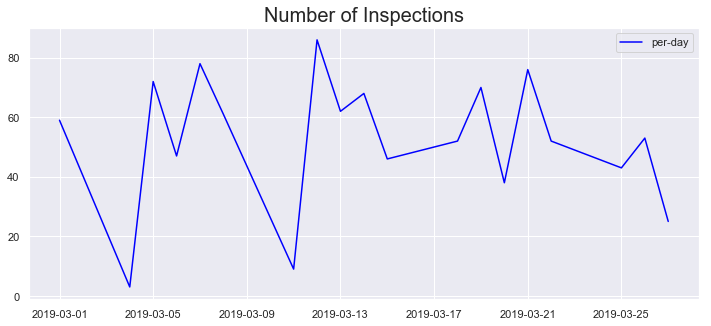

In [666]:
plt.figure(figsize=(12,5))
plt.title('Number of Inspections')
per_week = pd.DataFrame()
per_week =  food_data[['inspection_date', 'inspection_id']]
per_week.index = pd.to_datetime(per_week['inspection_date'])
per_day = per_week.groupby('inspection_date').count()
per_week = per_week.resample('W').count()
plt.plot(per_day, color='blue', label = 'per-day')
#plt.plot(per_week, color = 'red', label = " per week")
plt.legend(loc='best')
plt.show()

In [667]:
food_data['results'].value_counts()

Pass w/ Conditions    407
Pass                  241
Fail                  210
Out of Business        51
No Entry               47
Not Ready              44
Name: results, dtype: int64

Text(0.5, 1.0, 'Result of Inspections')

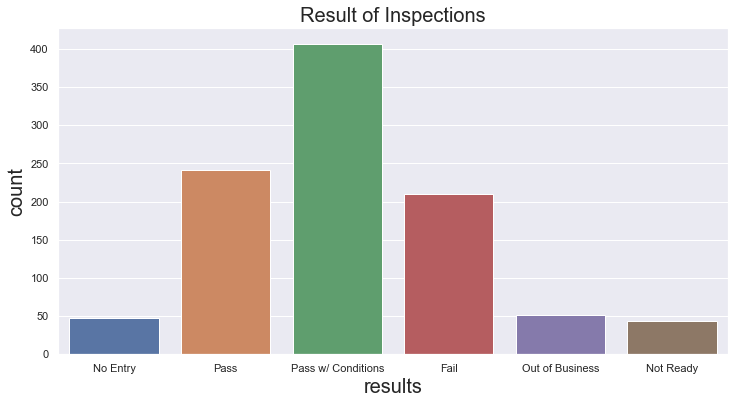

In [668]:
ax = sns.countplot(x="results", data=food_data)
plt.title("Result of Inspections")
plt.show()

In [669]:
print("%d different types of food establishment facilities were inspected during the period and %d different types of inpsections were conducted during the period."% 
(food_data['facility_type'].nunique(), food_data['inspection_type'].nunique()))

36 different types of food establishment facilities were inspected during the period and 10 different types of inpsections were conducted during the period.


In [670]:
food_data['inspection_type'].value_counts()

Canvass                                   475
License                                   221
Canvass Re-Inspection                     130
Complaint                                  71
License Re-Inspection                      58
Complaint Re-Inspection                    34
Short Form Complaint                        4
Suspected Food Poisoning                    4
Recent Inspection                           2
Suspected Food Poisoning Re-inspection      1
Name: inspection_type, dtype: int64

<Figure size 864x432 with 0 Axes>

Text(0.5, 1.0, 'Result of Inspections')

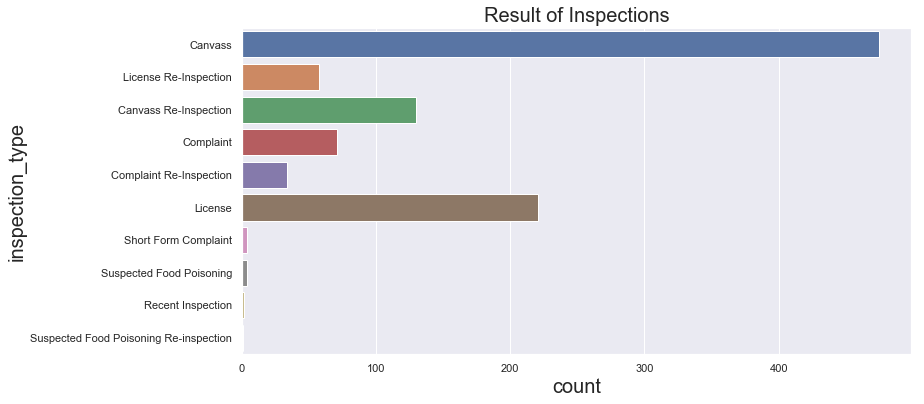

In [671]:
plt.figure(figsize=(12, 6))
ax = sns.countplot(y="inspection_type", data=food_data)
plt.title("Result of Inspections")
plt.show()

<Figure size 864x720 with 0 Axes>

Restaurant                         631
School                             121
Grocery Store                      106
Children's Services Facility        19
Long Term Care                      15
Bakery                              14
Daycare Above and Under 2 Years     12
Mobile Food Preparer                 7
Catering                             6
Daycare (2 - 6 Years)                6
Name: facility_type, dtype: int64

Text(0.5, 1.0, 'Types of Facilities Inspected')

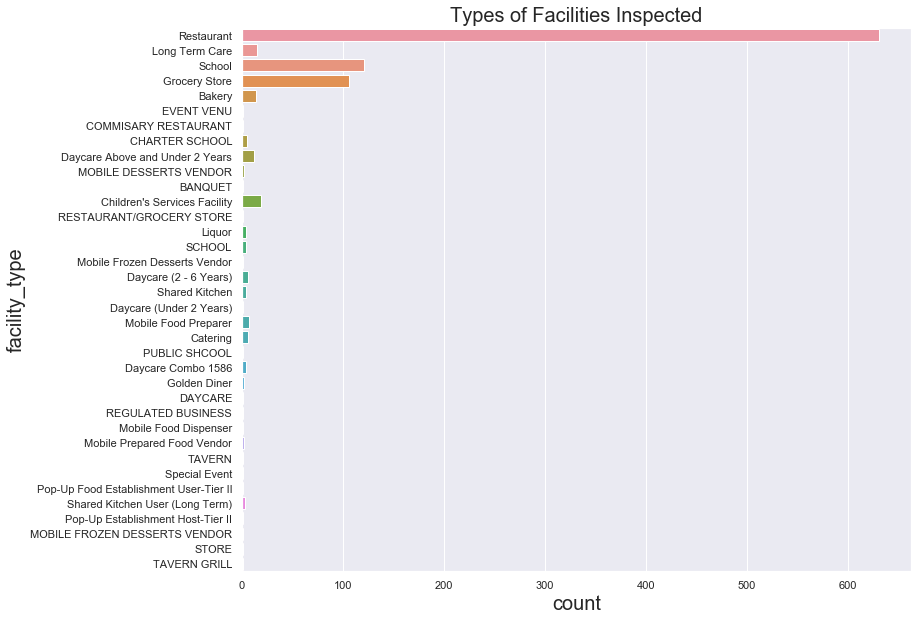

In [672]:
plt.figure(figsize=(12, 10))
food_data['facility_type'].value_counts()[0:10]
ax = sns.countplot(y="facility_type", data=food_data)
plt.title("Types of Facilities Inspected")
plt.show()

<Figure size 864x720 with 0 Axes>

Risk 1 (High)      795
Risk 2 (Medium)    117
Risk 3 (Low)        84
All                  4
Name: risk, dtype: int64

Text(0.5, 1.0, 'Risk')

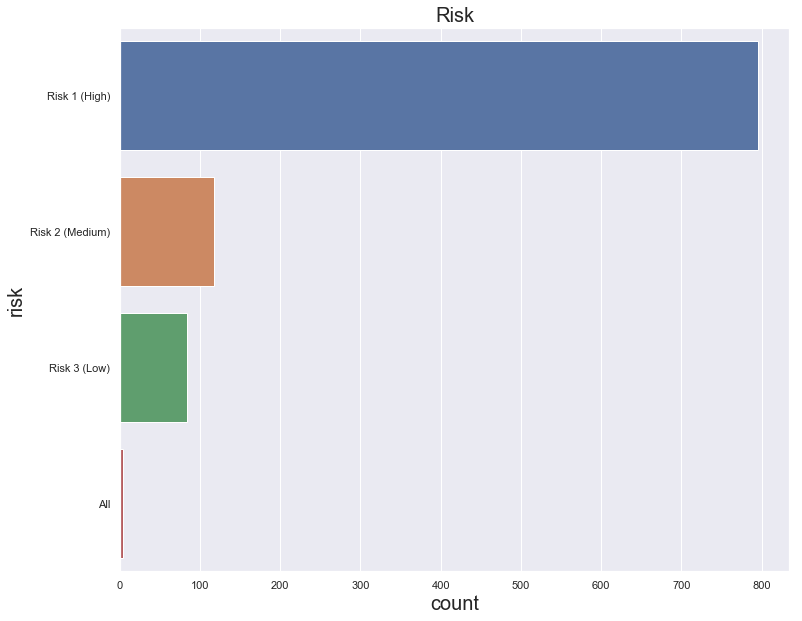

In [673]:
plt.figure(figsize=(12, 10))
food_data['risk'].value_counts()[0:10]
ax = sns.countplot(y="risk", data=food_data)
plt.title("Risk")
plt.show()

## Label Encoding categorical variables:

1. There are couple different ways of label encoding categorical variables. First method is to replace those variables with a dictionary involving key and value pairs of the variables to be encoded:

In [674]:
results_conv = {"results" : {"Fail" : 0, "Pass" : 1, "Pass w/ Conditions" : 2, "Out of Business": 3, "No Entry": 4 , "Not Ready": 5}}
food_data.replace(results_conv, inplace=True)
print(food_data.results.dtype)

int64


2. Another method is to change their type as categorical variable. Let's convert inspection_type for example as as categorical variable. 

In [675]:
food_data["inspection_type"] = food_data["inspection_type"].astype('category')
food_data["facility_type"] = food_data["facility_type"].astype('category')
food_data["risk"] = food_data["risk"].astype('category')
print(food_data.inspection_type.dtype)
print(food_data.facility_type.dtype)
print(food_data.risk.dtype)

category
category
category


In [676]:
food_data["inspection_type_cat"] = food_data["inspection_type"].cat.codes
food_data["facility_type_cat"] = food_data["facility_type"].cat.codes
food_data["risk_type_cat"] = food_data["risk"].cat.codes
food_data.head()

,address,aka_name,city,dba_name,facility_type,inspection_date,inspection_id,inspection_type,latitude,license_,location,longitude,results,risk,state,violations,zip,inspection_type_cat,facility_type_cat,risk_type_cat
0,6248 N CALIFORNIA AVE,MUSASHI JAPANESE RESTAURANT,CHICAGO,MUSASHI JAPANESE RESTAURANT,Restaurant,2019-03-27,2280158,Canvass,41.995400,47917,"{'type': 'Point', 'coordinates': [-87.69971133...",-87.699711,4,Risk 1 (High),IL,None,60659.0,0,27,1
1,6182 N NORTHWEST HWY,WINESTYLES,CHICAGO,WINESTYLES,Restaurant,2019-03-27,2280117,License Re-Inspection,41.994044,2632296,"{'type': 'Point', 'coordinates': [-87.80211988...",-87.802120,1,Risk 2 (Medium),IL,52. SEWAGE & WASTE WATER PROPERLY DISPOSED - C...,60631.0,5,27,2
10,10210 S CENTRAL PARK AVE,STARBUCKS (ST XAVIER MORRIS HALL),CHICAGO,STARBUCKS,Restaurant,2019-03-27,2280150,Canvass,41.707481,2464644,"{'type': 'Point', 'coordinates': [-87.71131771...",-87.711318,1,Risk 2 (Medium),IL,10. ADEQUATE HANDWASHING SINKS PROPERLY SUPPLI...,60655.0,0,27,2
100,204 N WELLS ST,THE VEGGIE GRILL,CHICAGO,"THE VEGGIE GRILL, INC",Restaurant,2019-03-25,2280011,Canvass,41.885863,2560625,"{'type': 'Point', 'coordinates': [-87.63408111...",-87.634081,2,Risk 1 (High),IL,"1. PERSON IN CHARGE PRESENT, DEMONSTRATES KNOW...",60606.0,0,27,1
101,10939 S WESTERN AVE,SEE THRU CHINESE KITCHEN,CHICAGO,SEE THRU CHINESE KITCHEN,Restaurant,2019-03-25,2279985,Canvass Re-Inspection,41.694221,36468,"{'type': 'Point', 'coordinates': [-87.68108589...",-87.681086,1,Risk 1 (High),IL,51. PLUMBING INSTALLED; PROPER BACKFLOW DEVICE...,60643.0,1,27,1


In [677]:
pass_inspection = food_data[(food_data['results']== 1) | (food_data['results']== 2) ]
fail_inspection = food_data[food_data['results']== 0]

In [678]:
import plotly.plotly as py
import plotly.graph_objs as go
mapbox_access_token = "pk.eyJ1IjoiZGlwYWtyaW1hbCIsImEiOiJjanR0NHp5Z3gxOGVtNGVsbHIxOGI3ZmV6In0.bmrI81LR7L441sUKqDeKmw"

data_pass = [
    go.Scattermapbox(
        lat=pass_inspection['latitude'],
        lon=pass_inspection['longitude'],
        mode='markers',
        marker=go.scattermapbox.Marker(
            size=12,
            color='rgb(50, 255, 100)',
            opacity=0.7
        ),
        text = pass_inspection['dba_name']  + ' <br> Pass ',
        hoverinfo='text'
    ),
    go.Scattermapbox(
        lat=fail_inspection['latitude'],
        lon=fail_inspection['longitude'],
        mode='markers',
        marker=go.scattermapbox.Marker(
            size=12, 
            color='rgb(255, 0, 0)',
            opacity=0.7
        ),
         text = fail_inspection['dba_name'] + ' <br> Fail ',
         hoverinfo='text'
    )   
]


layout = go.Layout(
    title = "Chicago Food Insepections",
    autosize=True,
    showlegend=False,
    hovermode='closest',
    mapbox=go.layout.Mapbox(
        accesstoken=mapbox_access_token,
        bearing=0,
        center=go.layout.mapbox.Center(
            lat=41.9,
            lon=-87.6
        ),
        pitch=0,
        zoom=9,
        style='light'
    ),
)

fig = go.Figure(data=data_pass, layout=layout)

py.iplot(fig, filename='Chicago')

High five! You successfully sent some data to your account on plotly. View your plot in your browser at https://plot.ly/~dipakrimal/0 or inside your plot.ly account where it is named 'Chicago'


<Figure size 864x432 with 0 Axes>

Text(0.5, 1.0, ' Types of Inspections ')

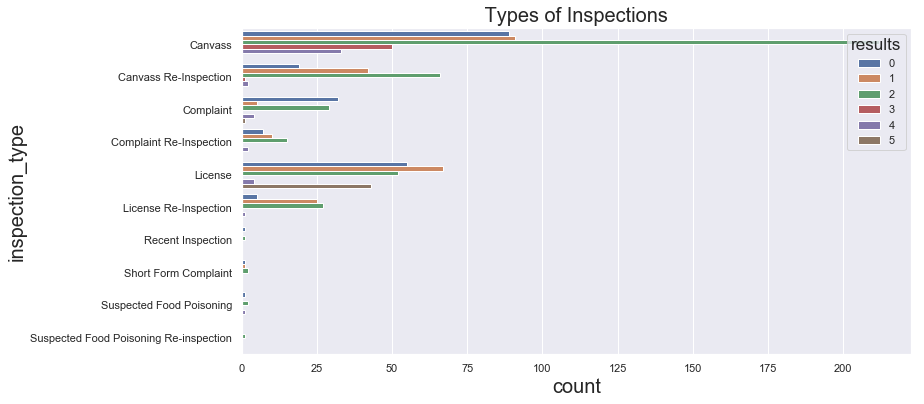

In [679]:
plt.figure(figsize=(12, 6))
ax = sns.countplot(y="inspection_type", hue="results", data=food_data)
plt.title(" Types of Inspections ")
plt.show()

<Figure size 864x432 with 0 Axes>

Text(0.5, 1.0, ' Types of Inspections for facilities that passed the inspection ')

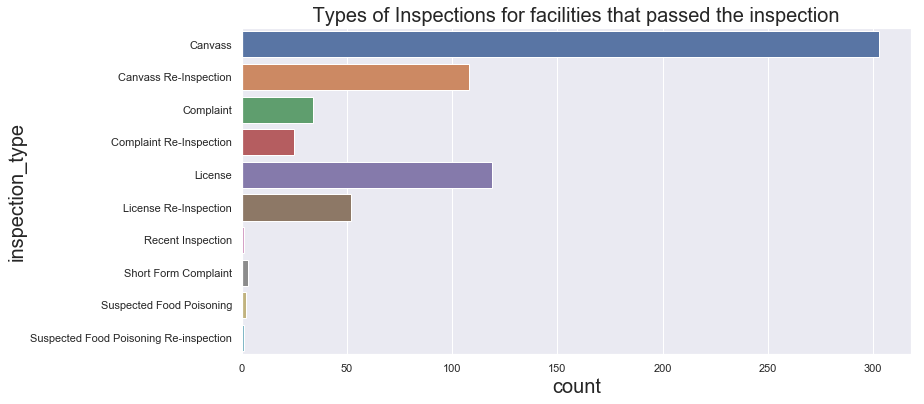

In [680]:
plt.figure(figsize=(12, 6))
ax = sns.countplot(y="inspection_type", data=pass_inspection)
plt.title(" Types of Inspections for facilities that passed the inspection ")
plt.show()

<Figure size 864x432 with 0 Axes>

Text(0.5, 1.0, ' Types of Inspections for facilities that failed the inspection ')

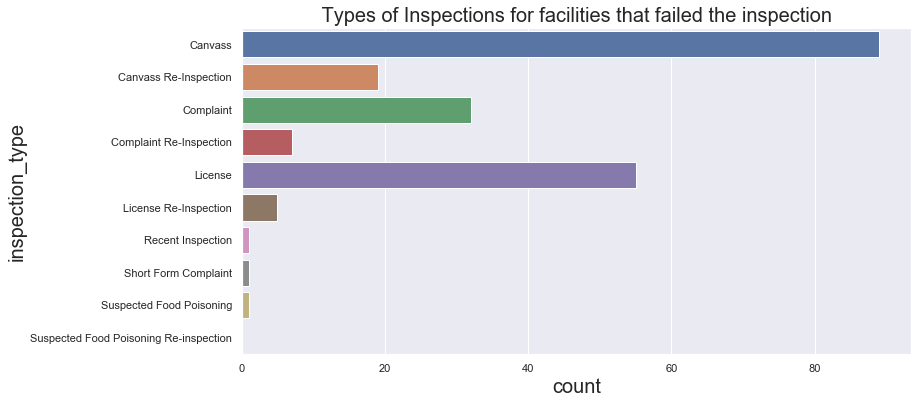

In [681]:
plt.figure(figsize=(12, 6))
ax = sns.countplot(y="inspection_type", data=fail_inspection)
plt.title(" Types of Inspections for facilities that failed the inspection ")
plt.show()

<Figure size 1296x432 with 0 Axes>

Text(0.5, 1.0, 'risk type vs result ')

<Figure size 1296x432 with 0 Axes>

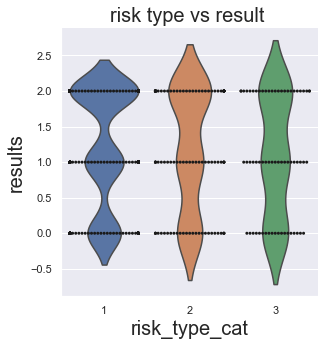

In [682]:
data_pass_fail=food_data[food_data['results'] < 3]
plt.figure(figsize=(18, 6))
g = sns.catplot(x="risk_type_cat", y="results", kind="violin", inner=None, data=data_pass_fail)
sns.swarmplot(x="risk_type_cat", y="results", color="k", size=3, data=data_pass_fail, ax=g.ax);
#ax = sns.swarmplot(x= "risk_type_cat", y="results", hue='inspection_type_cat', data=data_pass_fail, kind='bar')
plt.title("risk type vs result ")
plt.show()